# **Sales Records Study**

## Objectives

* Fetch dataset from Kaggle and download in inputs folder
* Inspect dataset and correct if need be
* Save inspected dataset in outputs folder

## Inputs

* Kaggle JSON file - Authentication Token 

## Outputs

* Generate Dataset: outputs/datasets/collection/Sales-Records

## Additional Comments

* Dataset was found on a public data base so there were no security concerns
* Kaggle JSON file was deleted since it contained Key


---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/House-Sales/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/House-Sales'

---

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/SalesRecord.csv"))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False).head(10)
corr_spearman

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64

In [6]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False).head(10)
corr_pearson

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64

In [7]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'GarageArea',
 'GrLivArea',
 'OverallQual',
 'SalePrice',
 'TotalBsmtSF',
 'YearBuilt'}

In [8]:
vars_to_study = ['GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']

---

In [9]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,548,1710,7,856,2003,208500
1,460,1262,6,1262,1976,181500
2,608,1786,7,920,2001,223500


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
target_var = 'SalesPrice'
vars_to_study = ['GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
df_eda = df.filter(vars_to_study + ['SalePrice'])


def plot_categorical(df, col, target_var):
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

def plot_numerical(df, col):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()
    
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col)
        print("\n\n")

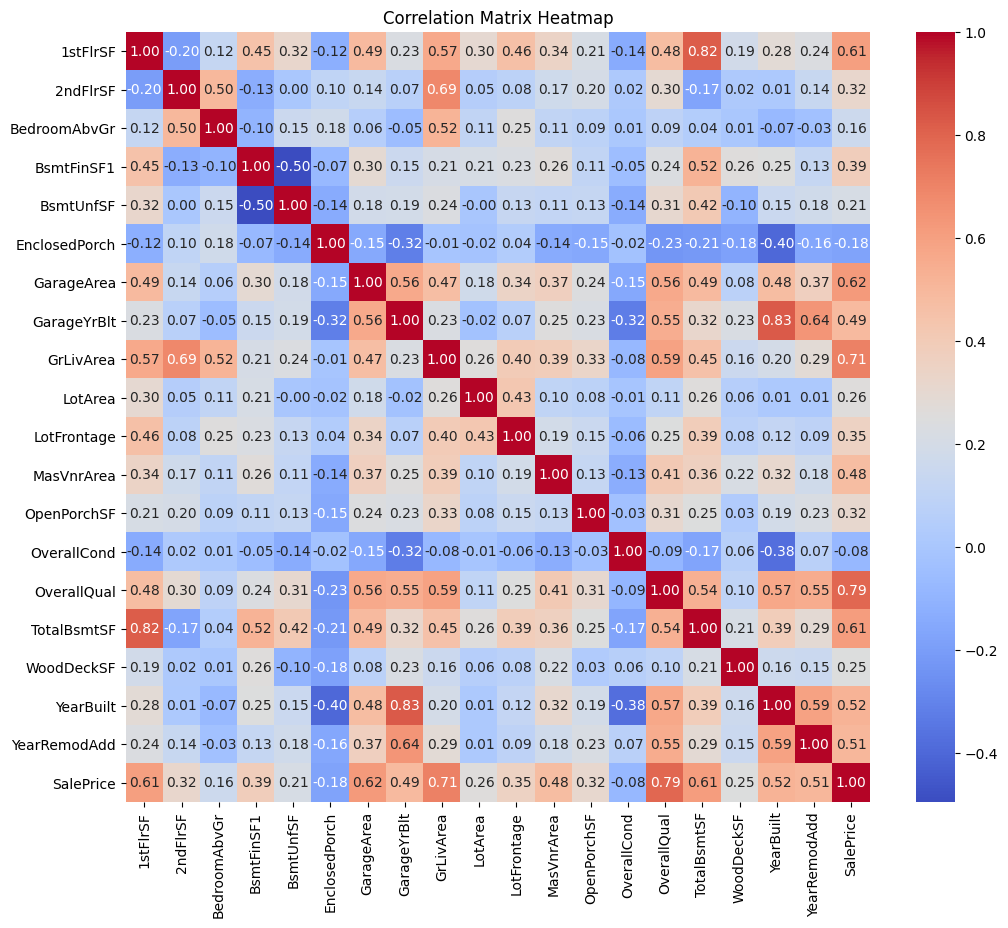


Correlation with SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch    0.176458
BedroomAbvGr     0.161901
OverallCond      0.077856
Name: SalePrice, dtype: float64


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Get the correlation of each category with 'SalePrice'
saleprice_correlation = correlation_matrix['SalePrice']

# Sort the correlations in descending order
sorted_correlations = saleprice_correlation.abs().sort_values(ascending=False)

# Display the sorted correlations
print("\nCorrelation with SalePrice:")
print(sorted_correlations)

## Conclusions and Next Steps

The correlations and plots interpretation converge.

* Sales Price typically increases with OverallQual
* Sales Price typically increases with GrLivArea
* Sales Price typically increases with GarageArea